In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Load the data 
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset 
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [3]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())
# Drop the missing values
customers.dropna(inplace=True)
products.dropna(inplace=True)
transactions.dropna(inplace=True)

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
# Convert 'SignupDate' and 'TransactionDate' to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [5]:
# Merge the customer data with transaction data to get a complete customer profile
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')

# Merge with products data to get product information
full_data = pd.merge(customer_transactions, products, on='ProductID', how='left')

print(full_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [6]:
# Check column names in the merged dataframe to ensure 'Price' exists
print(full_data.columns)

# If 'Price' is not found, verify if it's named differently in the products dataframe
print(products.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')


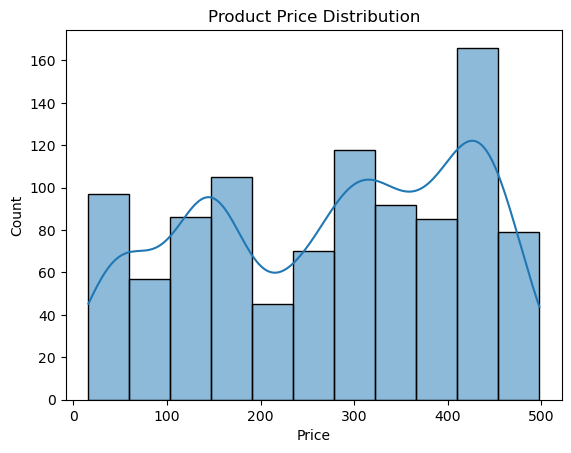

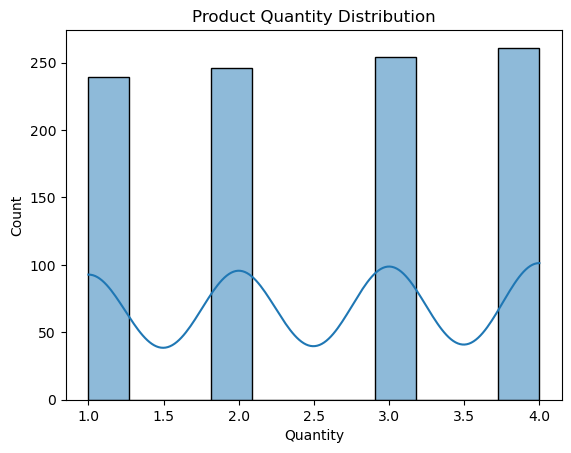

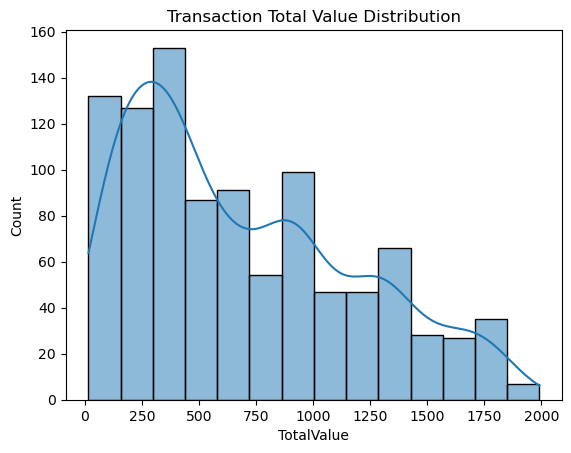

In [7]:
full_data.drop(columns=['Price_x'], inplace=True)

full_data.rename(columns={'Price_y': 'Price'}, inplace=True)

# Now check the distribution of the 'Price' column
sns.histplot(full_data['Price'], kde=True)
plt.title('Product Price Distribution')
plt.show()

# Check the distribution of the 'Quantity' column
sns.histplot(full_data['Quantity'], kde=True)
plt.title('Product Quantity Distribution')
plt.show()

# Check the distribution of 'TotalValue' 
sns.histplot(full_data['TotalValue'], kde=True)
plt.title('Transaction Total Value Distribution')
plt.show()

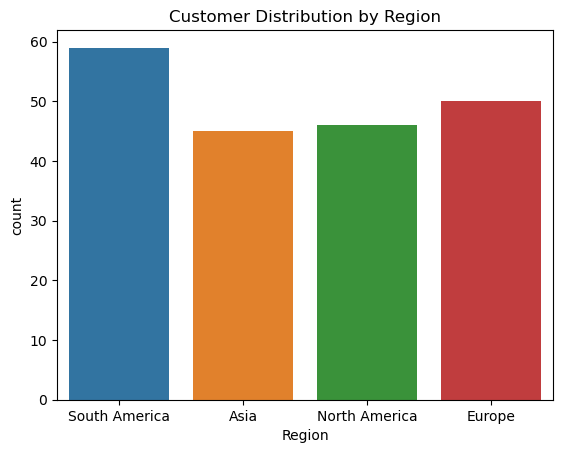

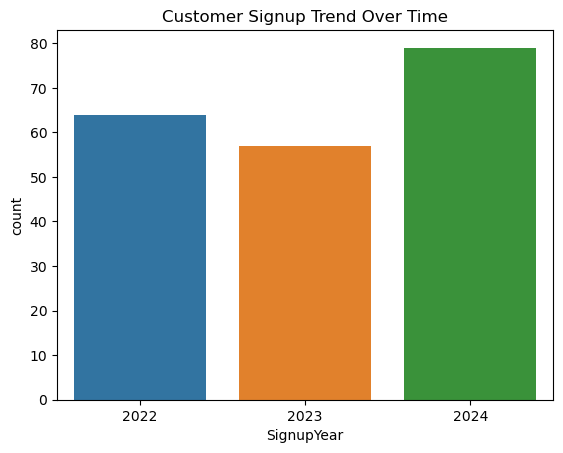

In [8]:
# Distribution of customers by region
sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()

# Customer signup trend over time
customers['SignupYear'] = customers['SignupDate'].dt.year
sns.countplot(x='SignupYear', data=customers)
plt.title('Customer Signup Trend Over Time')
plt.show()

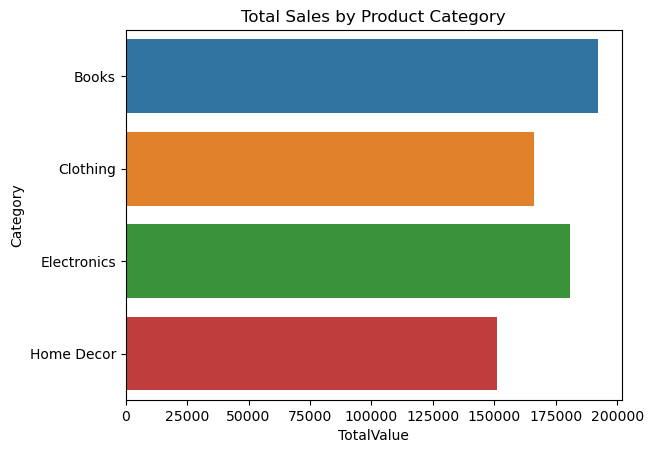

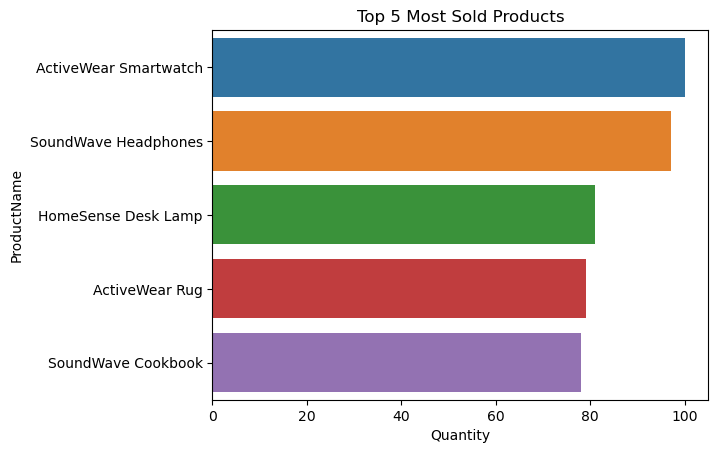

In [9]:
# Total sales per product category
sales_by_category = full_data.groupby('Category')['TotalValue'].sum().reset_index()
sns.barplot(x='TotalValue', y='Category', data=sales_by_category)
plt.title('Total Sales by Product Category')
plt.show()

# Top 5 most sold products
top_products = full_data.groupby('ProductName')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(5)
sns.barplot(x='Quantity', y='ProductName', data=top_products)
plt.title('Top 5 Most Sold Products')
plt.show()